## ThinkDSP

This notebook contains code examples from Chapter 11: Modulation and sampling

Copyright 2015 Allen Downey

Special thanks to my colleague Siddhartan Govindasamy; the sequence of topics in this notebook is based on material he developed for Signals and Systems at Olin College, which he and Oscar Mur-Miranda and I co-taught in Spring 2015.

License: [Creative Commons Attribution 4.0 International](http://creativecommons.org/licenses/by/4.0/)

In [1]:
from __future__ import print_function, division

import thinkdsp
import thinkplot

import numpy as np

import warnings
warnings.filterwarnings('ignore')

PI2 = 2 * np.pi

np.set_printoptions(precision=3, suppress=True)
%matplotlib inline

### Convolution with impulses - simple way to synthesize interesting sounds. 

To demonstrate the effect of convolution with impulses, I'll load a short beep sound.

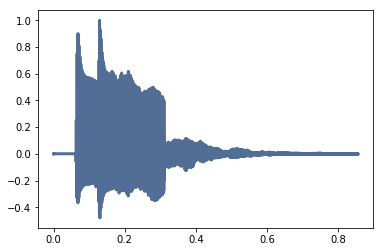

In [2]:
wave = thinkdsp.read_wave('253887__themusicalnomad__positive-beeps.wav')
wave.normalize()
wave.plot()

Here's what it sounds like.

In [3]:
wave.make_audio()

And here's a sequence of 4 impulses with diminishing amplitudes:

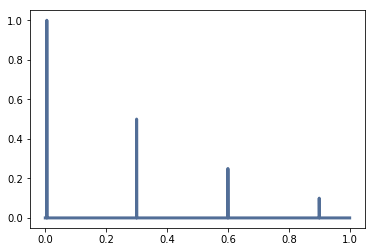

In [4]:
imp_sig = thinkdsp.Impulses([0.005, 0.3, 0.6, 0.9], amps=[1, 0.5, 0.25, 0.1])
impulses = imp_sig.make_wave(start=0, duration=1.0, framerate=wave.framerate)
impulses.plot()

If we convolve the wave with the impulses, we get 4 shifted, scaled copies of the original sound.

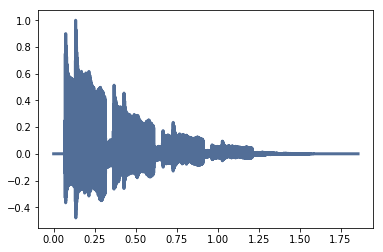

In [5]:
convolved = wave.convolve(impulses)
convolved.plot()

And here's what it sounds like.

In [6]:
convolved.make_audio()

###Amplitude modulation (AM)

The previous example gives some insight into how AM works.

First I'll load a recording that sounds like AM radio.

In [7]:
wave = thinkdsp.read_wave('105977__wcfl10__favorite-station.wav')
wave.unbias()
wave.normalize()
wave.make_audio()

Here's what the spectrum looks like:

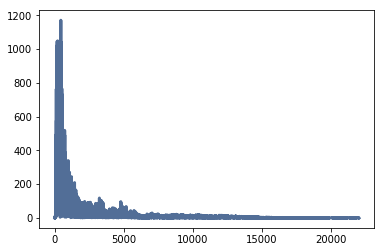

In [8]:
spectrum = wave.make_spectrum()
spectrum.plot()

For the following examples, it will be more useful to look at the full spectrum, which includes the negative frequencies.  Since we are starting with a real signal, the spectrum is always symmetric.

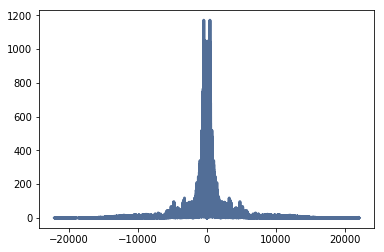

In [9]:
spectrum = wave.make_spectrum(full=True)
spectrum.plot()

Amplitude modulation works my multiplying the input signal by a "carrier wave", which is a cosine, 10 kHz in this example.

In [10]:
carrier_sig = thinkdsp.CosSignal(freq=10000)
carrier_wave = carrier_sig.make_wave(duration=wave.duration, framerate=wave.framerate)

The `*` operator performs elementwise multiplication.

In [11]:
modulated = wave * carrier_wave

The result sounds pretty horrible.

In [12]:
modulated.make_audio()

Why?  Because multiplication in the time domain corresponds to convolution in the frequency domain.  The DFT of the carrier wave is two impulses; convolution with those impulses makes shifted, scaled copies of the spectrum.

Specifically, AM modulation has the effect of splitting the spectrum in two halves and shifting the frequencies by 10 kHz (notice that the amplitudes are half what they were in the previous plot).

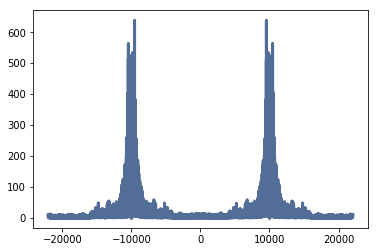

In [13]:
modulated.make_spectrum(full=True).plot()

To recover the signal, we modulate it again.

In [14]:
demodulated = modulated * carrier_wave

Each half of the spectrum gets split and shifted again.  Two of the quarters get shifted to 0 and added up.  The other two are at $\pm$20Khz

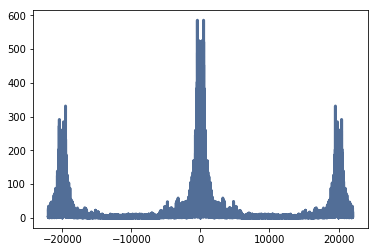

In [15]:
demodulated_spectrum = demodulated.make_spectrum(full=True)
demodulated_spectrum.plot()

If you listen to it now, it sounds pretty good.  You probably can't hear the extra components at high frequencies.

In [16]:
demodulated.make_audio()

If we compare the input and output signals, they are pretty close.

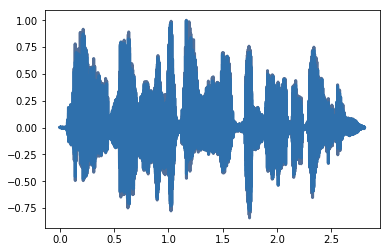

In [17]:
wave.plot()
demodulated.plot()

If the high frequency components bother you, you can clobber them by applying a low pass filter.  In this example, I use a "brick wall" filter that cuts off sharply at 10 kHz.  In real applications, we would use a more gentle filter.

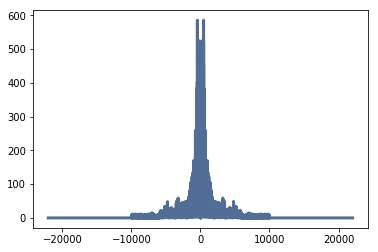

In [18]:
demodulated_spectrum.low_pass(10000)
demodulated_spectrum.plot()

Here's what it sounds like after filtering.

In [19]:
filtered = demodulated_spectrum.make_wave()
filtered.make_audio()

To understand how AM works, let's see what's going on in the frequency domain.

When we multiply two signals in the time domain, that corresponds to convolution in the frequency domain.  The carrier wave is a cosine at 10 kHz, so its spectrum is two impulses, at $\pm$ 10 kHz

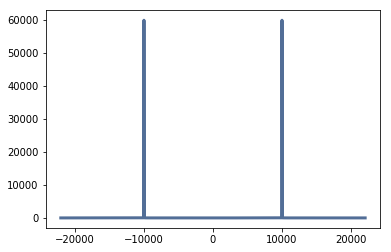

In [20]:
carrier_spectrum = carrier_wave.make_spectrum(full=True)
carrier_spectrum.plot()

As we saw in the beep example, convolution with impulses makes shifted, scaled copies.

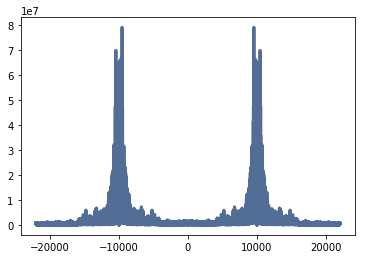

In [21]:
convolved = spectrum.convolve(carrier_spectrum)
convolved.plot()

After one convolution, we have two peaks.  After two convolutions, we have four.

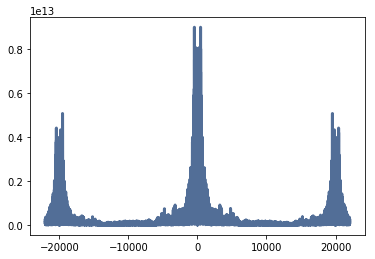

In [22]:
reconvolved = convolved.convolve(carrier_spectrum)
reconvolved.plot()

And that's how AM works.  Now let's talk about sampling.

